## 로지스틱 회귀분류 모델

In [1]:
### 데이터 준비하기
# - 구글드라이브 > Dataset > 머신러닝 > data > 05_생선_분류_데이터셋.csv
# - 데이터프레임 변수명 : fish

In [2]:
import pandas as pd

file_path = "./data/05_생선_분류_데이터셋.csv"

fish = pd.read_csv(file_path)
fish

# Species	Weight	Length	Diagonal	Height	Width
#  종류      무게    길이     대각선     높이    두께

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672


In [4]:
### 종류 특성의 고유한 값 조회하기
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [8]:
### 독립변수 추출하기
# - 변수명은 fish_input
# - 사이킷런 훈련에 사용하는 형태로 만들어주세요..출력까지..

fish_input = fish[["Weight", "Length", "Diagonal", 
                      "Height", "Width"]].to_numpy()
fish_input

### 상위 5개 추출하기
fish_input[ : 5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [9]:
### 종속변수 만들기 : 1차원..
# - 변수명 : fish_target

fish_target = fish["Species"].to_numpy()
fish_target

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach',
       'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Roach', 'Whitefish',
       'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish', 'Whitefish',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki',
       'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Parkki', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch', 'Perch',
       'Perc

In [13]:
### 훈련데이터와 테스트데이터로 나누기
# - 변수명 어제와 동일
# - seed = 42

### 사용 패키지 불러들이기
from sklearn.model_selection import train_test_split

### 데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

### 차원 확인하기
print(train_input.shape)
print(train_target.shape)
print(test_input.shape)
print(test_target.shape)

(119, 5)
(119,)
(40, 5)
(40,)


In [ ]:
### 정규화(표준화) : 스케일 표준화
# - 변수 : train_scaled, test_scaled

In [14]:
### 정규화(표준화)
# 1. 정규화 : 스케일이 다른 항목들을 "표준점수"로 동일하게 표준화시키기
#   - 표준점수는 사이킷런에서 제공하는 클래스(모델) 사용

#  <정규화 순서>
#   1.1 정규화(표준점수) 클래스 생성 : StandardScaler()
#   1.2 훈련 시키기 : fit(훈련데이터) -> 스스로 표준점수 생성
#   1.3 변환하기 : transform(훈련데이터) -> 표준점수로 변환하기
#   1.4 표준점수에 사용된 5개 항목에 대한 평균과, 표준편차 확인
#      - StandardScaler 클래스 내에 mean_, scale_ 변수에 저장되어 있음

### 라이브러리 생성
from sklearn.preprocessing import StandardScaler

### 클래스(모델) 생성
ss = StandardScaler()

### 스스로 표준점수 생성
ss.fit(train_input)

### 훈련데이터를 표준점수로 변환하기
train_scaled = ss.transform(train_input)
### 테스트데이터를 표준점수로 변환하기
test_scaled = ss.transform(test_input)

### 샘플 5개 행 출력해 보기
train_scaled[:5]

array([[ 0.91965782,  0.60943175,  0.81041221,  1.85194896,  1.00075672],
       [ 0.30041219,  1.54653445,  1.45316551, -0.46981663,  0.27291745],
       [-1.0858536 , -1.68646987, -1.70848587, -1.70159849, -2.0044758 ],
       [-0.79734143, -0.60880176, -0.67486907, -0.82480589, -0.27631471],
       [-0.71289885, -0.73062511, -0.70092664, -0.0802298 , -0.7033869 ]])

In [15]:
### k-최근접이웃분류 모델로 테스트
# - 이웃 : 3개
### 라이브러리 불러들이기
from sklearn.neighbors import KNeighborsClassifier

### 클래스(모델) 생성하기
kn = KNeighborsClassifier(n_neighbors=3)

### 훈련모델 생성하기
kn.fit(train_scaled, train_target)

### 훈련데이터 정확도
print(kn.score(train_scaled, train_target))
### 테스트데이터 정확도
print(kn.score(test_scaled, test_target))


0.8907563025210085
0.85


In [20]:
### 상위 5개 예측하기
print(kn.predict(test_scaled[:5]))
print(test_target[:5])

# [[실제값, 예측값], [실제값, 예측값].....]
import numpy as np

np.column_stack((test_target[:5], kn.predict(test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']
['Perch' 'Smelt' 'Pike' 'Whitefish' 'Perch']


array([['Perch', 'Perch'],
       ['Smelt', 'Smelt'],
       ['Pike', 'Pike'],
       ['Whitefish', 'Perch'],
       ['Perch', 'Perch']], dtype=object)

In [22]:
### 각 행의 범주들의 확률값 확인
# - 확률값의 범위 : 0 ~ 1 (0% ~ 100%)
# - 확률값 조회 함수 : predict_proba(테스트데이터)
# - 사이킷런 분류 모델 공통으로 사용됨...
proba = kn.predict_proba(test_scaled[:5])
np.round(proba, decimals=4)

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [23]:
print(pd.unique(fish["Species"]))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [25]:
### 훈련모델이 가지고 있는 범주의 리스트 값 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [31]:
### 5개의 데이터의 이웃들 확인하기..
# - 각 행마다 이웃이 3개씩..
distances, indexes = kn.kneighbors(test_scaled[:5])
print(indexes)
for test_data in test_scaled[:5] :
    distances, indexes = kn.kneighbors([test_data])
    print(train_target[indexes])

[[ 39  64  63]
 [ 93  99  43]
 [100 105  27]
 [104 115 106]
 [ 72  26  68]]
[['Perch' 'Perch' 'Perch']]
[['Smelt' 'Smelt' 'Smelt']]
[['Pike' 'Pike' 'Pike']]
[['Roach' 'Perch' 'Perch']]
[['Perch' 'Perch' 'Roach']]


## 로지스틱 회귀분류(Logistic Regression)

In [35]:
### 선형방정식 사용 : 다중회귀 방정식과 동일
# - z = a * x1 + b * x2 .... + y절편
# - z값 구하는 함수 : decision_function(훈련데이터)
# - z값의 범위 : 0보다 작거나 크거나..
### 확률 : 0~1 사이의 값을 사용(0% ~ 100%)
# - 따라서, z값은 확률의 0~1사이의 값으로 변환하는 작업이 필요..
### 이때 사용하는 방법
# - 시그모이드 방식(이진분류방식 사용), 
# - 소프트맥스 방식(다중분류방식 사용)
#   (모두 함수 지원됨)

## 로지스틱 회귀로 이진분류하기
##### - 시그모이드 함수 사용

In [36]:
train_scaled
train_target

array(['Bream', 'Pike', 'Smelt', 'Perch', 'Parkki', 'Roach', 'Perch',
       'Bream', 'Perch', 'Perch', 'Perch', 'Bream', 'Perch', 'Parkki',
       'Perch', 'Bream', 'Smelt', 'Perch', 'Roach', 'Bream', 'Pike',
       'Bream', 'Pike', 'Perch', 'Parkki', 'Bream', 'Perch', 'Pike',
       'Bream', 'Perch', 'Parkki', 'Roach', 'Perch', 'Bream', 'Roach',
       'Perch', 'Bream', 'Bream', 'Perch', 'Perch', 'Roach', 'Pike',
       'Perch', 'Smelt', 'Pike', 'Roach', 'Perch', 'Parkki', 'Perch',
       'Bream', 'Perch', 'Smelt', 'Perch', 'Parkki', 'Smelt', 'Perch',
       'Perch', 'Roach', 'Bream', 'Perch', 'Perch', 'Roach', 'Roach',
       'Perch', 'Perch', 'Bream', 'Roach', 'Bream', 'Roach', 'Parkki',
       'Perch', 'Perch', 'Perch', 'Perch', 'Pike', 'Pike', 'Perch',
       'Bream', 'Perch', 'Bream', 'Whitefish', 'Pike', 'Bream', 'Bream',
       'Roach', 'Perch', 'Pike', 'Bream', 'Pike', 'Parkki', 'Roach',
       'Perch', 'Roach', 'Smelt', 'Whitefish', 'Roach', 'Perch', 'Bream',
       'Whitefi

In [37]:
### 이진분류 방식은 2개의 범주만 사용가능합니다.
# - 기존 데이터에서 2개(Bream과 Smelt) 범주만 추출하여 사용
# 독립변수명 : train_bream_smelt
# 종속변수명 : target_bream_smelt
target_bream_smelt = train_target[(train_target == "Bream") | 
                                  (train_target == "Smelt")]
target_bream_smelt.shape

train_bream_smelt = train_scaled[(train_target == "Bream") | \
                                  (train_target == "Smelt")]
train_bream_smelt.shape

(33, 5)

In [38]:
### 이진분류 하기
### 사용할 패키지 불러들이기
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)
lr.score(train_bream_smelt, target_bream_smelt)

1.0

In [39]:
## 예측 상위5개
lr.predict(train_bream_smelt[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [40]:
### 5개 행에 대한 범주별 확률 조회
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [41]:
### 훈련모델이 가지고 있는 범주의 순서
print(lr.classes_)

['Bream' 'Smelt']


In [42]:
### 계수(또는 가중치) 및 y절편값 조회하기
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [43]:
#-0.4037798*Diagonal + -0.57620209*Height, Length, Weight, Width, + -2.16155132

In [44]:
# 이진분류에서 z값(선형방정식의 결과값들)을 0~1로 변환...
# z값 조회하기
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

### 시그모이드 함수 : 싸이파이 패키지의 expit()
from scipy.special import expit
print(expit(decisions))

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]
[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


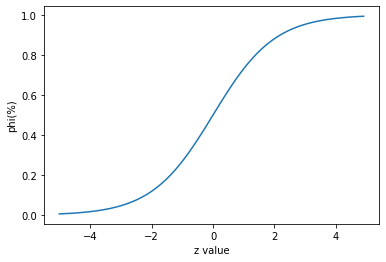

In [45]:
### 시그모이드 함수 예시

import numpy as np
import matplotlib.pyplot as plt

### 임의의 z값
z = np.arange(-5, 5, 0.1)

### 시그모이드 공식 사용 
# - np.exp() : 0~1의 지수로 변환하기
#            : z값의 스케일을 통일 시키기 위해서
#            : z값은 음수로 처리(제곱승 시에 분모로 계산)
#            : 2^(-2) = 1/(2^2), 2^0 = 1
phi = 1 / (1 + np.exp(-z))

plt.xlabel("z value")
plt.ylabel("phi(%)")

plt.plot(z, phi)
plt.show()

In [46]:
### 시그모이드 함수를 이용하여
# z값 각각(5개)에 대해서 확률 계산하기
from scipy.special import expit

print(expit(decisions))

### (해석)
# - predict_proba() 함수의 결과 중 
# - 1번째(양성)에 해당하는 열에 대해서만 반환을 합니다.

# - 따라서, 위에 z값 또한 predict_proba() 함수의 결과의
#   1번째(양성)에 해당하는 열에 대한 결과 값 입니다.

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


## 다중분류 

In [47]:
### 다중분류는 모든 범주를 사용합니다.
# - 독립변수도 모든 특성을 사용합니다.
# - 모든 특성을 사용하다 보니 복잡도에 대한 부분을 고려해야 합니다.
#   (너무 복잡해도 안되고, 느슨해도 안되고..적당히..)
# - 사용하는 클래스 : 이진분류와 동일
# - 복잡도를 강약으로 조절하기 위해 규제강도 조절값 사용

# - 규제강도 조절값 속성명 : C (대문자), 기존의 alpha와 같음
#  : alpha 값은 클수록 강도가 커졌다면,
#  : C값은 작을 수록 강도가 커집니다.
#  : 기본값은 1, 보통 20 정도로 완화 시킨 후 진행

# - 훈련반복횟수 사용
#  : 훈련모델은 정확도를 높이기 위해 일반적으로 반복 수행을 합니다.
#  : 기본 반복횟수 : 100회
#  : 훈련 중에 100회보다 더 해야 하는 경우 경고 창이 뜨는 경우 있음
#  : 독립변수의 특성이 많을 수록 훈련 반복회수가 늘어나는 경우 발생
#  : 반복횟수 속성값 : max_iter 
#  : 보통 반복횟수를 1000으로 놓고 진행하는 경우가 많음
# - 이외 모든 훈련 함수는 기존과 동일

In [49]:
### 규제강도 = 20
### 반복회수 = 1000회
# 훈련데이터와 테스트데이터에 대한 정확도 확인해 주세요..

lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [50]:
### 상위 5건으로 예측 진행
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [54]:
### 전체 범주별 확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 3))

print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [56]:
### 사용된 계수와 y절편
print(lr.coef_)
print(lr.intercept_)

[[-1.49002062 -1.02912771  2.59345455  7.70357729 -1.20070142]
 [ 0.19618224 -2.01068309 -3.77976726  6.5049152  -1.99482653]
 [ 3.56279766  6.34357108 -8.489711   -5.75757363  3.79307271]
 [-0.10458104  3.6031948   3.93067819 -3.61736789 -1.75069685]
 [-1.40061468 -6.07503401  5.25969338 -0.87220017  1.86043666]
 [-1.38526202  1.49214519  1.39226123 -5.67734148 -4.40097553]
 [ 0.62149846 -2.32406626 -0.90660908  1.71599068  3.69369096]]
[-0.0920518  -0.2629088   3.25101324 -0.14742921  2.65498311 -6.7878303
  1.38422375]


In [57]:
### z 산술연산 결과 확인하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=3))

[[ -6.498   1.032   5.164  -2.729   3.339   0.327  -0.634]
 [-10.859   1.927   4.771  -2.398   2.978   7.841  -4.26 ]
 [ -4.335  -6.233   3.174   6.487   2.358   2.421  -3.872]
 [ -0.683   0.453   2.647  -1.187   3.265  -5.753   1.259]
 [ -6.397  -1.993   5.816  -0.11    3.503  -0.112  -0.707]]


In [59]:
### 소프트맥스(softmax)
# 사용하는 패키지 : scipy.special 
# 사용하는 모듈 : softmax

from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
